# VisionMath - Testing Notebook

In [1]:
import numpy as np
import cv2
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from ipywidgets import interact, fixed, widgets
import pytesseract as pts
pts.pytesseract.tesseract_cmd = r'C:\Users\adrid\Desktop\Programas\VC\VCEnvironment\tesseract'
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
images_path = '../images/'

### **<span style="color:green"><b><i>Testing Images</i></b></span>**

134



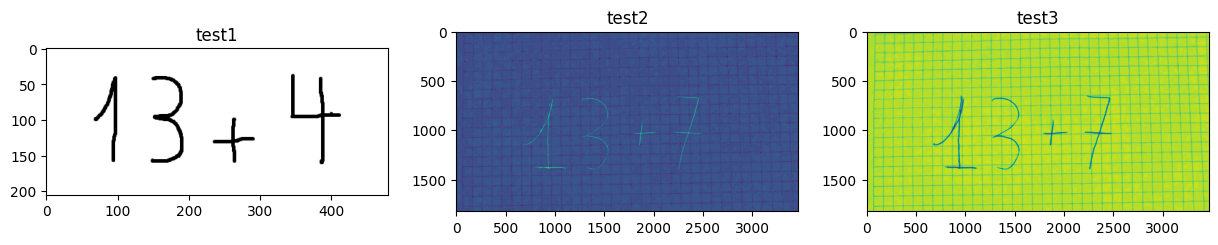

In [2]:
image_1 = cv2.imread(images_path + "test1.jpg",-1)
image_2 = cv2.imread(images_path + "test2.jpg",-1)
image_3 = cv2.imread(images_path + "test3.jpg",-1)

imagePrueba = cv2.imread(images_path + "prueba.png")

print(pts.image_to_string(imagePrueba))

image_1 = cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB)
image_3 = cv2.cvtColor(image_3,cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(image_1, cv2.COLOR_RGB2LAB)

plt.subplot(1,3,1)
plt.title("test1")
plt.imshow(imagePrueba)

plt.subplot(132)
plt.title("test2")
plt.imshow(hsv[:,:,1])

plt.subplot(133)
plt.title("test3")
plt.imshow(hsv[:,:,2])

### **<span style="color:green"><b><i>GrayScale Images</i></b></span>**

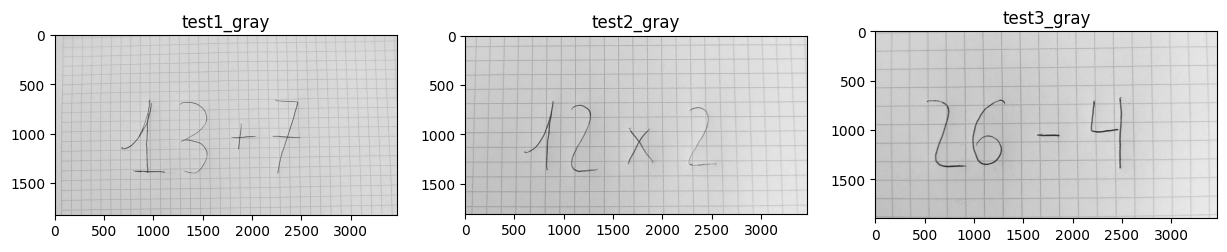

In [3]:
image1_gray = np.copy(image_1)
image1_gray = cv2.cvtColor(image1_gray,cv2.COLOR_RGB2GRAY)
image2_gray = np.copy(image_2)
image2_gray = cv2.cvtColor(image2_gray,cv2.COLOR_RGB2GRAY)
image3_gray = np.copy(image_3)
image3_gray = cv2.cvtColor(image3_gray,cv2.COLOR_RGB2GRAY)

plt.subplot(1,3,1)
plt.title("test1_gray")
plt.imshow(image1_gray,cmap='gray')

plt.subplot(132)
plt.title("test2_gray")
plt.imshow(image2_gray,cmap='gray')

plt.subplot(133)
plt.title("test3_gray")
plt.imshow(image3_gray,cmap='gray')

### <font color="blue"><b><i>1.- Gaussian Filtering</i></b></font>

Function taken from previous notebooks

In [4]:
def gaussian_bell1D(x,sigma):

    base = 1/(sigma * np.sqrt(2 * np.pi))
    exp = np.exp(-(x*x) / (2*(sigma * sigma)))

    return base * exp

def gaussian_filter(image, w_kernel, sigma, verbose=False):
    """ Applies Gaussian filter to an image and display it.   

        Args:
            image: Input image
            w_kernel: Kernel aperture size
            sigma: standard deviation of Gaussian distribution
            verbose: Only show images if this is True
        
        Returns:
            smoothed_img: smoothed image 
    """
    # Write your code here!
    
    # Create kernel using associative property
    s = sigma
    w = w_kernel
    kernel_1D = np.float32([gaussian_bell1D(z,s) for z in range(-w,w+1)]) # Evaluate the gaussian in "expression"
    vertical_kernel = kernel_1D.reshape(2*w+1,1) # Reshape it as a matrix with just one column
    horizontal_kernel = kernel_1D.reshape(1,2*w+1) # Reshape it as a matrix with just one row
    kernel = signal.convolve2d(vertical_kernel, horizontal_kernel) # Get the 2D kernel

    # Convolve image and kernel
    smoothed_img = cv2.filter2D(image,cv2.CV_8U,kernel)
    
    if verbose:
        # Show the initial image
        #plt.subplot(121)
        plt.imshow(smoothed_img, cmap='grey')
        plt.title('Gaussian Filter')
        plt.show()
            
        # Show the resultant one
        #plt.subplot(122)
        plt.imshow(image, cmap='grey')
        plt.title('Original')
    
    return smoothed_img

In [5]:
interact(gaussian_filter, image=fixed(image1_gray), w_kernel=(0,5,1), sigma=(1,3,0.3), verbose=fixed(True))

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), FloatSlider(value=1.9, description='s…

<function __main__.gaussian_filter(image, w_kernel, sigma, verbose=False)>

#### W_kernel = 3 and Sigma= 2.2 are good values, so we apply those values to all of them

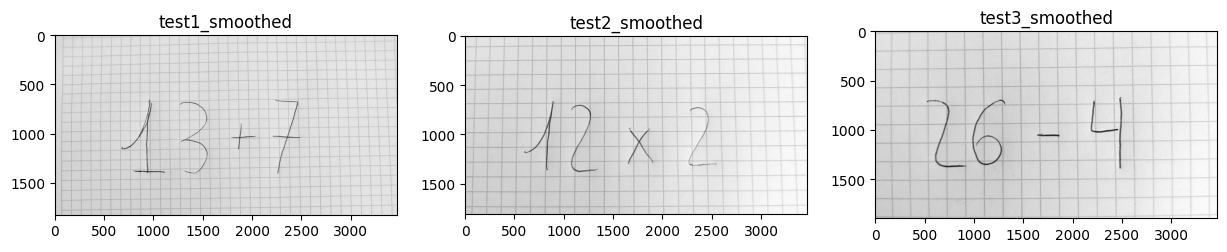

In [6]:
smoothed_img1 = gaussian_filter(image1_gray,w_kernel=3,sigma=2.2,verbose=False)
smoothed_img2 = gaussian_filter(image2_gray,w_kernel=3,sigma=2.2,verbose=False)
smoothed_img3 = gaussian_filter(image3_gray,w_kernel=3,sigma=2.2,verbose=False)

plt.subplot(1,3,1)
plt.title("test1_smoothed")
plt.imshow(smoothed_img1,cmap='gray')

plt.subplot(132)
plt.title("test2_smoothed")
plt.imshow(smoothed_img2,cmap='gray')

plt.subplot(133)
plt.title("test3_smoothed")
plt.imshow(smoothed_img3,cmap='gray')

### <font color="blue"><b><i>2.1 - Realce Local - CLAHE</i></b></font>

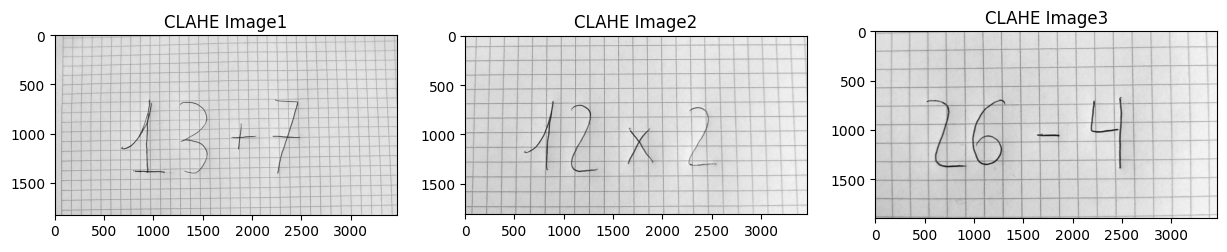

In [39]:
clahe = cv2.createCLAHE(clipLimit=1,tileGridSize=(4,4))
enhaced_smoothed1 = clahe.apply(smoothed_img1)
enhaced_smoothed2 = clahe.apply(smoothed_img2)
enhaced_smoothed3 = clahe.apply(smoothed_img3)

plt.subplot(131)
plt.title("CLAHE Image1")
plt.imshow(enhaced_smoothed1,cmap='grey')

plt.subplot(132)
plt.title("CLAHE Image2")
plt.imshow(enhaced_smoothed2,cmap='grey')

plt.subplot(133)
plt.title("CLAHE Image3")
plt.imshow(enhaced_smoothed3,cmap='grey')

### <font color="blue"><b><i>3.- K-Means Binarization</i></b></font>

Function taken from previous notebooks

In [7]:
def binarize_kmeans(image,it):
    """ Binarize an image using k-means.   

        Args:
            image: Input image
            it: K-means iteration
    """    
    
    # Set random seed for centroids 
    cv2.setRNGSeed(124)
    
    # Flatten image
    flattened_img = image.reshape((-1,1))
    flattened_img = np.float32(flattened_img)
    
    #Set epsilon
    epsilon = 0.2
    
    # Estabish stopping criteria (either `it` iterations or moving less than `epsilon`)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, it, epsilon)
    
    # Set K parameter (2 for thresholding)
    K = 2
    
    # Call kmeans using random initial position for centroids
    _,label,center=cv2.kmeans(flattened_img,K,None,criteria,it,cv2.KMEANS_RANDOM_CENTERS)
    
    # Colour resultant labels
    center = np.uint8(center) # Get center coordinates as unsigned integers   
    print(center)
    flattened_img = center[label.flatten()] # Get the color (center) assigned to each pixel
    
    # Reshape vector image to original shape
    binarized = flattened_img.reshape((image.shape))

    return binarized
    
    # Show resultant image
    plt.subplot(2,1,1)
    plt.title("Original image")
    plt.imshow(binarized, cmap='gray',vmin=0,vmax=255)
    
    # Show how original histogram have been segmented
    plt.subplot(2,1,2)
    plt.title("Segmented histogram")
    plt.hist([image[binarized==center[0]].ravel(), image[binarized==center[1]].ravel()],256,[0,256], color=["black","gray"],stacked="true")

[[110]
 [156]]
[[100]
 [149]]
[[ 94]
 [149]]


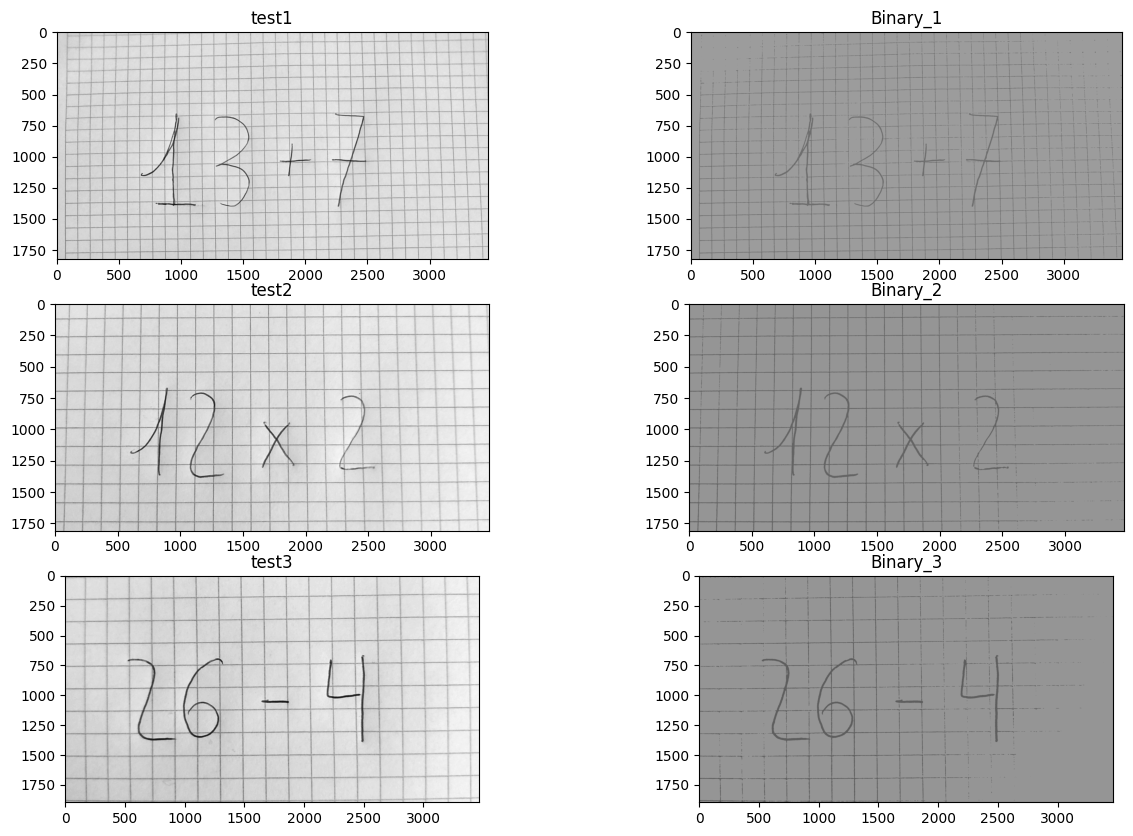

In [49]:
binary_img1 = binarize_kmeans(enhaced_smoothed1,5)
binary_img2 = binarize_kmeans(enhaced_smoothed2,5)
binary_img3 = binarize_kmeans(enhaced_smoothed3,5)

# Show resultant image
plt.subplot(3,2,1)
plt.title("test1")
plt.imshow(enhaced_smoothed1,cmap='gray')

plt.subplot(3,2,2)
plt.title("Binary_1")
plt.imshow(binary_img1,cmap='gray',vmin=0,vmax=255)

plt.subplot(3,2,3)
plt.title("test2")
plt.imshow(enhaced_smoothed2,cmap='gray')

plt.subplot(3,2,4)
plt.title("Binary_2")
plt.imshow(binary_img2,cmap='gray',vmin=0,vmax=255)

plt.subplot(3,2,5)
plt.title("test3")
plt.imshow(enhaced_smoothed3,cmap='gray')

plt.subplot(3,2,6)
plt.title("Binary_3")
plt.imshow(binary_img3,cmap='gray',vmin=0,vmax=255)

### <font color="blue"><b><i>2.2 - EM binarization</i></b></font>

### <font color="blue"><b><i>2.3 - Adaptative Thresholding</i></b></font>

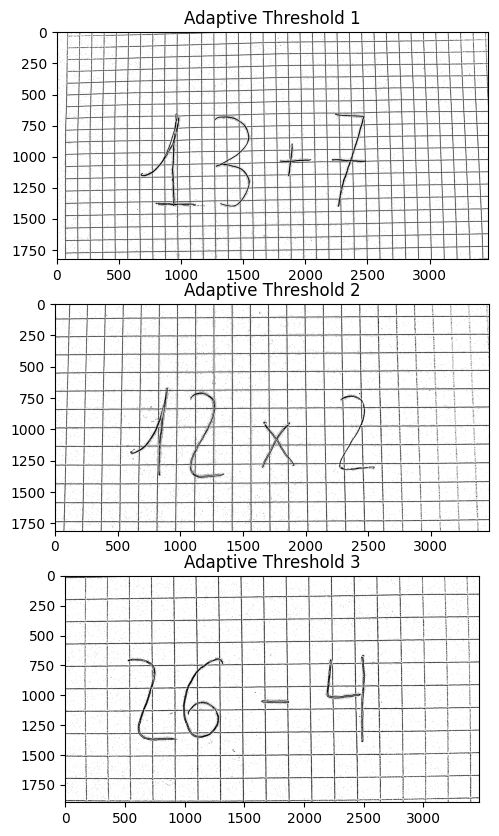

In [53]:
adaptive_th1 = cv2.adaptiveThreshold(enhaced_smoothed1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
adaptive_th2 = cv2.adaptiveThreshold(enhaced_smoothed2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
adaptive_th3 = cv2.adaptiveThreshold(enhaced_smoothed3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

kernel = (31,31)
dilate = cv2.dilate(th2,kernel,iterations = 5)
erosion = cv2.erode(dilate,kernel,iterations = 1)
opening = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel, 5)

plt.subplot(311)
plt.title("Adaptive Threshold 1")
plt.imshow(adaptive_th1,cmap='grey')

plt.subplot(312)
plt.title("Adaptive Threshold 2")
plt.imshow(adaptive_th2,cmap='grey')

plt.subplot(313)
plt.title("Adaptive Threshold 3")
plt.imshow(adaptive_th3,cmap='grey')


### <font color="blue"><b><i>2.4 - Morphology Transformation</i></b></font>

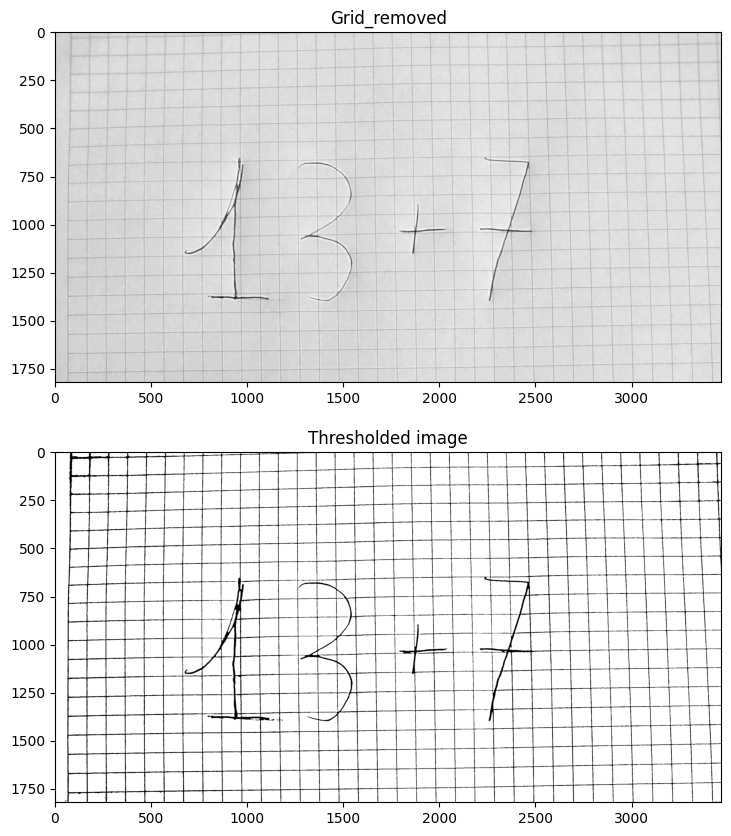

In [56]:
kernel = np.ones((5,5),np.uint8)
grid_removed = cv2.morphologyEx(enhaced_smoothed1,cv2.MORPH_DILATE,kernel)

_,morph_image = cv2.threshold(grid_removed,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(211)
plt.title("Grid_removed")
plt.imshow(grid_removed,cmap='grey')

plt.subplot(212)
plt.title("Thresholded image")
plt.imshow(morph_image,cmap='grey')

### <font color="blue"><b><i>2.5 - LUT</i></b></font>

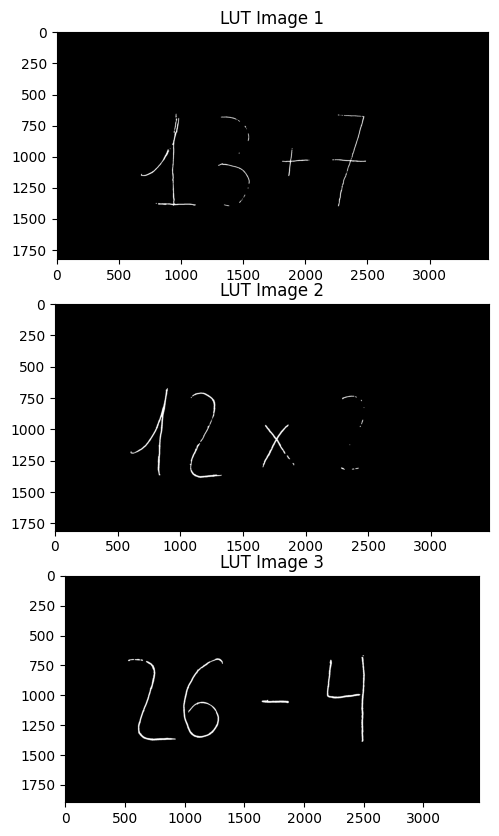

In [94]:
lut = np.arange(256)
umbral = 80
kernel = np.ones((5,5),np.uint8)

lut[lut <= umbral] = 0
lut[lut >= umbral] = 255

wq32

lut_img1 = cv2.bitwise_not(lut_img1) 
lut_img2 = cv2.bitwise_not(lut_img2)
lut_img3 = cv2.bitwise_not(lut_img3)


lut_img1 = cv2.morphologyEx(lut_img1,cv2.MORPH_OPEN,kernel)
lut_img2 = cv2.morphologyEx(lut_img2,cv2.MORPH_OPEN,kernel,)
lut_img3 = cv2.morphologyEx(lut_img3,cv2.MORPH_OPEN,kernel)

plt.subplot(311)
plt.title("LUT Image 1")
plt.imshow(lut_img1,cmap='grey')

plt.subplot(312)
plt.title("LUT Image 2")
plt.imshow(lut_img2,cmap='grey')

plt.subplot(313)
plt.title("LUT Image 3")
plt.imshow(lut_img3,cmap='grey')

In [78]:
print(pts.image_to_string(lut_img1))